<a href="https://colab.research.google.com/github/meghanadaddanala/NLP/blob/main/Batch-8_fakenewsdetection_NLPCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pad_sequences
import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=e071ac4d4bd329508759ab6aded5dc7c23994413f1ced862dfa74ac8ebf9622c
  Stored in directory: /root/.cache/pip/wheels/3f/80/05/48e28be7b6bde8b3378f747f50bc32a87cb281c2e89ae74500
Successfully built pad-sequences


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df=df.drop(['id','title','author'],axis='columns')


In [ ]:
df




,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of Both labels ')

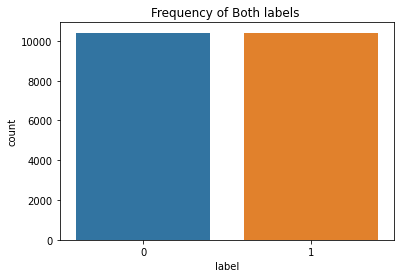

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.label)
plt.title('Frequency of Both labels ')

In [ ]:
X=df['text']
Y=df.label
X,Y

(0        House Dem Aide: We Didn’t Even See Comey’s Let...
 1        Ever get the feeling your life circles the rou...
 2        Why the Truth Might Get You Fired October 29, ...
 3        Videos 15 Civilians Killed In Single US Airstr...
 4        Print \nAn Iranian woman has been sentenced to...
                                ...                        
 20795    Rapper T. I. unloaded on black celebrities who...
 20796    When the Green Bay Packers lost to the Washing...
 20797    The Macy’s of today grew from the union of sev...
 20798    NATO, Russia To Hold Parallel Exercises In Bal...
 20799      David Swanson is an author, activist, journa...
 Name: text, Length: 20800, dtype: object, 0        1
 1        0
 2        1
 3        1
 4        1
         ..
 20795    0
 20796    0
 20797    0
 20798    1
 20799    1
 Name: label, Length: 20800, dtype: int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
Y=Y.reshape(-1,1)
Y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
#Different models for converting text to vector
from sklearn.feature_extraction.text import CountVectorizer #BOW
from gensim.models import Word2Vec

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Creating a copy 
clean_news=df.copy()

In [ ]:
import string
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
clean_news['text']=clean_news['text'].apply(lambda x:review_cleaning(x))
clean_news.head()

,text,label
0,house dem aide we didn’t even see comey’s lett...,1
1,ever get the feeling your life circles the rou...,0
2,why the truth might get you fired october th...,1
3,videos civilians killed in single us airstrik...,1
4,print an iranian woman has been sentenced to s...,1


In [ ]:


stop = stopwords.words('english')
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,text,label
0,house dem aide didn’t even see comey’s letter ...,1
1,ever get feeling life circles roundabout rathe...,0
2,truth might get fired october tension intellig...,1
3,videos civilians killed single us airstrike id...,1
4,print iranian woman sentenced six years prison...,1


In [ ]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['text']].reset_index(drop=True)
news_features.head()

,text
0,house dem aide didn’t even see comey’s letter ...
1,ever get feeling life circles roundabout rathe...
2,truth might get fired october tension intellig...
3,videos civilians killed single us airstrike id...
4,print iranian woman sentenced six years prison...


In [ ]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)#Getting the target variable
y=clean_news['label']

In [ ]:

len(corpus),len(y)

(20800, 20800)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(corpus,y,test_size=0.2,random_state=2)

In [ ]:
len(xtrain),len(ytrain),len(xval),len(yval)


(16640, 16640, 4160, 4160)

In [ ]:
xtrain

['jeffrey snider alhambra invest partner grow bodi public work suggest feder reserv offici prepar differ sort normal envis year come note earlier realiz economi rough shape like remain way forese futur import caveat left bleak pronounc actual ceteri paribu long current polici monetari system remain firmli place littl hope global economi spontan ignit sinc economist central banker made clear go anywher despit wrong everyth even janet yellen forc conced even fed manag get rate hike ultim destin nomin term much less prior cycl current think seem aim around feder fund rate rather long accept way thing go japanes show lucki get even half far anoth sign twist upsid easili recept pretzel logic mainstream suppos good thing especi stock write today bloombergview moham elerian chief econom advisor allianz make exact argument equiti investor also reassur grow correct recognit fed hike cycl depart drastic histor norm instead follow rel linear path increas regular interv pronounc stopgo characteris

In [ ]:
docs=[text.split() for text in xtrain]

In [ ]:
len(docs)

16640

In [ ]:
import gensim
w2v_model = gensim.models.Word2Vec(size=300, window=3,min_count=5, workers=8)

In [ ]:
w2v_model.build_vocab(docs)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 33639


In [ ]:
w2v_model.train(docs,total_examples=len(docs),epochs=32)

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

from keras_preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(xtrain), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(xval), maxlen=300)

Total words 117970


In [ ]:
x_train

array([[  1323,     57,   1343, ...,    165,     18,    822],
       [     0,      0,      0, ...,   2317,    961,   3866],
       [   388,   1075,    540, ...,     29,   2278,    554],
       ...,
       [   557,   5161,   1407, ...,    135,     13,      1],
       [   163,    363,    726, ...,     95,    161, 117968],
       [     0,      0,      0, ...,   1823,     48,     46]], dtype=int32)

In [ ]:
len(x_train),len(ytrain),len(x_test),len(yval)
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(117970, 300)


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35640547,  1.0335443 , -0.51430243, ...,  0.52572334,
        -0.54403377,  0.37773415],
       [ 0.34108809,  1.02579606, -1.07181549, ...,  0.45565689,
        -1.53533912, -1.20756233],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# Build The model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          35391000  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 35,484,505
Trainable params: 93,505
Non-trainable params: 35,391,000
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

history = model.fit(x_train, ytrain,batch_size=32,epochs=5,validation_split=0.1,verbose=1,callbacks=callbacks)

Epoch 1/5
468/468 [==============================] - ETA: 0s - loss: 0.3203 - accuracy: 0.8666

468/468 [==============================] - 190s 397ms/step - loss: 0.3203 - accuracy: 0.8666 - val_loss: 0.2912 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 2/5
468/468 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.9105

468/468 [==============================] - 187s 399ms/step - loss: 0.2293 - accuracy: 0.9105 - val_loss: 0.3159 - val_accuracy: 0.8954 - lr: 0.0010
Epoch 3/5
468/468 [==============================] - ETA: 0s - loss: 0.1782 - accuracy: 0.9296

468/468 [==============================] - 183s 392ms/step - loss: 0.1782 - accuracy: 0.9296 - val_loss: 0.2368 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 4/5
468/468 [==============================] - ETA: 0s - loss: 0.1635 - accuracy: 0.9360

468/468 [==============================] - 182s 388ms/step - loss: 0.1635 - accuracy: 0.9360 - val_loss: 0.1657 - val_accuracy: 0.9345 - lr: 0.0010
Epoch 5/5
 88/468 [====>.........................] - ETA: 2:31 - loss: 0.1200 - accuracy: 0.9574

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

history = model.fit(x_train, ytrain,batch_size=32,epochs=10,validation_split=0.1,verbose=1,callbacks=callbacks)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

history = model.fit(x_train, ytrain,batch_size=32,epochs=15,validation_split=0.1,verbose=1,callbacks=callbacks)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

history = model.fit(x_train, ytrain,batch_size=32,epochs=20,validation_split=0.1,verbose=1,callbacks=callbacks)

In [ ]:
score = model.evaluate(x_test, yval, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])